# PREPARACION DE LOS DATOS

In [129]:
#Importar librerias
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import folium
from folium.plugins import HeatMap

In [130]:
#Importar datos
df = pd.read_csv("datos.csv",index_col=0,encoding="Windows-1252",sep=";")
df = df.dropna()
df["latitude"] = df["latitude"].astype(float)
df["longitude"] = df["longitude"].astype(float)
df

,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
ï»¿id,,,,,,,,,,,,,,,,,,,,,
5668610290,housing/rent/apartment,Studio apartment 333 Hyde St,"This unit is located at 333 Hyde St, San Franc...",Refrigerator,1.0,0.0,USD,No,Thumbnail,No permitido,...,"$ 1,495",Monthly,138,333 Hyde St,San Francisco,CA,37.7599,-122.4379,RentLingo,1577358313
5664571820,housing/rent/apartment,Studio apartment 57 Taylor Street,"This unit is located at 57 Taylor Street, San ...",Refrigerator,1.0,0.0,USD,No,Thumbnail,No permitido,...,"$ 1,695",Monthly,190,57 Taylor St,San Francisco,CA,37.7599,-122.4379,RentLingo,1577015121
5654898031,housing/rent/apartment,Studio Cottage 214,"New Bern Studio includes : 1 bedrooms, 1 micro...","AC,Basketball,Cable or Satellite,Gym,Internet ...",1.0,1.0,USD,No,Thumbnail,"Cats,Dogs",...,"$ 1,560",Monthly,200,180 Moonlight Lake Drive,New Bern,NC,35.0960,-77.0272,RentDigs.com,1576406273
5668622178,housing/rent/apartment,One BR 501 Chapel Drive,"This unit is located at 501 Chapel Drive, Tall...","Cable or Satellite,Clubhouse,Elevator,Internet...",1.0,1.0,USD,No,Thumbnail,No permitido,...,$ 544,Monthly,200,501 Chapel Dr,Tallahassee,FL,30.4601,-84.2714,RentLingo,1577359108
5668625234,housing/rent/apartment,Studio apartment 420 W. Fullerton Pkwy,"This unit is located at 420 W. Fullerton Pkwy,...","Cable or Satellite,Dishwasher,Internet Access,...",1.0,1.0,USD,No,Thumbnail,Cats,...,$ 942,Monthly,225,420 W Fullerton Parkway,Chicago,IL,41.8625,-87.6825,RentLingo,1577359301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5659898574,housing/rent/apartment,Five BR 55 West 10th Avenue,"This unit is located at 55 West 10th Avenue, C...","Dishwasher,Parking,Patio/Deck,Refrigerator",4.0,5.0,USD,No,Thumbnail,"Cats,Dogs",...,"$ 4,200",Monthly,4736,55 West 10th Ave,Columbus,OH,39.9974,-82.9829,RentLingo,1576666449
5668626631,housing/rent/apartment,Five BR 757 N Saint Andrews St,This unit is located at 757 N Saint Andrews St...,"Dishwasher,Internet Access,Refrigerator",5.0,5.0,USD,No,Thumbnail,No permitido,...,"$ 4,500",Monthly,4741,757 N Saint Andrews St,Wichita,KS,37.6836,-97.3369,RentLingo,1577359388
5668616326,housing/rent/apartment,Eight BR 46 N Breese Terrace,"This unit is located at 46 N Breese Terrace, M...","Dishwasher,Fireplace,Garbage Disposal,Parking,...",4.0,8.0,USD,No,Thumbnail,No permitido,...,"$ 8,345",Monthly,4900,46 N Breese Terrace,Madison,WI,43.0724,-89.4003,RentLingo,1577358721


In [131]:
#Ver las dimensiones del DataFrame
df.shape

(3543, 21)

In [132]:
df.head()

,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
ï»¿id,,,,,,,,,,,,,,,,,,,,,
5668610290,housing/rent/apartment,Studio apartment 333 Hyde St,"This unit is located at 333 Hyde St, San Franc...",Refrigerator,1.0,0.0,USD,No,Thumbnail,No permitido,...,"$ 1,495",Monthly,138,333 Hyde St,San Francisco,CA,37.7599,-122.4379,RentLingo,1577358313
5664571820,housing/rent/apartment,Studio apartment 57 Taylor Street,"This unit is located at 57 Taylor Street, San ...",Refrigerator,1.0,0.0,USD,No,Thumbnail,No permitido,...,"$ 1,695",Monthly,190,57 Taylor St,San Francisco,CA,37.7599,-122.4379,RentLingo,1577015121
5654898031,housing/rent/apartment,Studio Cottage 214,"New Bern Studio includes : 1 bedrooms, 1 micro...","AC,Basketball,Cable or Satellite,Gym,Internet ...",1.0,1.0,USD,No,Thumbnail,"Cats,Dogs",...,"$ 1,560",Monthly,200,180 Moonlight Lake Drive,New Bern,NC,35.0960,-77.0272,RentDigs.com,1576406273
5668622178,housing/rent/apartment,One BR 501 Chapel Drive,"This unit is located at 501 Chapel Drive, Tall...","Cable or Satellite,Clubhouse,Elevator,Internet...",1.0,1.0,USD,No,Thumbnail,No permitido,...,$ 544,Monthly,200,501 Chapel Dr,Tallahassee,FL,30.4601,-84.2714,RentLingo,1577359108
5668625234,housing/rent/apartment,Studio apartment 420 W. Fullerton Pkwy,"This unit is located at 420 W. Fullerton Pkwy,...","Cable or Satellite,Dishwasher,Internet Access,...",1.0,1.0,USD,No,Thumbnail,Cats,...,$ 942,Monthly,225,420 W Fullerton Parkway,Chicago,IL,41.8625,-87.6825,RentLingo,1577359301


In [133]:
#Se revisa los valores unicos del tipo de precio
df["price_type"].unique()

array(['Monthly'], dtype=object)

In [134]:
#Se revisa cuantos inmuebles hay por cada tipo de precio
df.groupby(["price_type"]).count()

,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,price,price_display,square_feet,address,cityname,state,latitude,longitude,source,time
price_type,,,,,,,,,,,,,,,,,,,,
Monthly,3543,3543,3543,3543,3543,3543,3543,3543,3543,3543,3543,3543,3543,3543,3543,3543,3543,3543,3543,3543


In [135]:
#Se eliminan las 2 filas con tipos de precio distintos a mensual para ser consistentes
df = df[~df["price_type"].isin(["Weekly", "Monthly|Weekly"])]
df

,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
ï»¿id,,,,,,,,,,,,,,,,,,,,,
5668610290,housing/rent/apartment,Studio apartment 333 Hyde St,"This unit is located at 333 Hyde St, San Franc...",Refrigerator,1.0,0.0,USD,No,Thumbnail,No permitido,...,"$ 1,495",Monthly,138,333 Hyde St,San Francisco,CA,37.7599,-122.4379,RentLingo,1577358313
5664571820,housing/rent/apartment,Studio apartment 57 Taylor Street,"This unit is located at 57 Taylor Street, San ...",Refrigerator,1.0,0.0,USD,No,Thumbnail,No permitido,...,"$ 1,695",Monthly,190,57 Taylor St,San Francisco,CA,37.7599,-122.4379,RentLingo,1577015121
5654898031,housing/rent/apartment,Studio Cottage 214,"New Bern Studio includes : 1 bedrooms, 1 micro...","AC,Basketball,Cable or Satellite,Gym,Internet ...",1.0,1.0,USD,No,Thumbnail,"Cats,Dogs",...,"$ 1,560",Monthly,200,180 Moonlight Lake Drive,New Bern,NC,35.0960,-77.0272,RentDigs.com,1576406273
5668622178,housing/rent/apartment,One BR 501 Chapel Drive,"This unit is located at 501 Chapel Drive, Tall...","Cable or Satellite,Clubhouse,Elevator,Internet...",1.0,1.0,USD,No,Thumbnail,No permitido,...,$ 544,Monthly,200,501 Chapel Dr,Tallahassee,FL,30.4601,-84.2714,RentLingo,1577359108
5668625234,housing/rent/apartment,Studio apartment 420 W. Fullerton Pkwy,"This unit is located at 420 W. Fullerton Pkwy,...","Cable or Satellite,Dishwasher,Internet Access,...",1.0,1.0,USD,No,Thumbnail,Cats,...,$ 942,Monthly,225,420 W Fullerton Parkway,Chicago,IL,41.8625,-87.6825,RentLingo,1577359301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5659898574,housing/rent/apartment,Five BR 55 West 10th Avenue,"This unit is located at 55 West 10th Avenue, C...","Dishwasher,Parking,Patio/Deck,Refrigerator",4.0,5.0,USD,No,Thumbnail,"Cats,Dogs",...,"$ 4,200",Monthly,4736,55 West 10th Ave,Columbus,OH,39.9974,-82.9829,RentLingo,1576666449
5668626631,housing/rent/apartment,Five BR 757 N Saint Andrews St,This unit is located at 757 N Saint Andrews St...,"Dishwasher,Internet Access,Refrigerator",5.0,5.0,USD,No,Thumbnail,No permitido,...,"$ 4,500",Monthly,4741,757 N Saint Andrews St,Wichita,KS,37.6836,-97.3369,RentLingo,1577359388
5668616326,housing/rent/apartment,Eight BR 46 N Breese Terrace,"This unit is located at 46 N Breese Terrace, M...","Dishwasher,Fireplace,Garbage Disposal,Parking,...",4.0,8.0,USD,No,Thumbnail,No permitido,...,"$ 8,345",Monthly,4900,46 N Breese Terrace,Madison,WI,43.0724,-89.4003,RentLingo,1577358721


In [136]:
#Se revisa que se hayan eliminado correctamente esas dos filas
df.groupby(["price_type"]).count()

,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,price,price_display,square_feet,address,cityname,state,latitude,longitude,source,time
price_type,,,,,,,,,,,,,,,,,,,,
Monthly,3543,3543,3543,3543,3543,3543,3543,3543,3543,3543,3543,3543,3543,3543,3543,3543,3543,3543,3543,3543


### CATEGORIZACION DE LAS COLUMNAS

In [137]:
# Categorizar las columnas necesarias
df = pd.get_dummies(df, columns = ['category'], dtype=int, drop_first=False)
df = pd.get_dummies(df, columns = ['pets_allowed'], dtype=int)
df = pd.get_dummies(df, columns = ['has_photo'], dtype=int)
df = pd.get_dummies(df, columns = ['cityname'], dtype=int)
df = pd.get_dummies(df, columns = ['state'],dtype=int)
df = pd.get_dummies(df, columns = ['source'],dtype=int)
df = pd.get_dummies(df, columns = ['price_type'],dtype= int)

df.head()

,title,body,amenities,bathrooms,bedrooms,currency,fee,price,price_display,square_feet,...,source_GoSection8,source_Listanza,source_ListedBuy,source_RENTCafÃˆ,source_RENTOCULAR,source_RentDigs.com,source_RentLingo,source_rentbits,source_tenantcloud,price_type_Monthly
ï»¿id,,,,,,,,,,,,,,,,,,,,,
5668610290,Studio apartment 333 Hyde St,"This unit is located at 333 Hyde St, San Franc...",Refrigerator,1.0,0.0,USD,No,1495,"$ 1,495",138,...,0,0,0,0,0,0,1,0,0,1
5664571820,Studio apartment 57 Taylor Street,"This unit is located at 57 Taylor Street, San ...",Refrigerator,1.0,0.0,USD,No,1695,"$ 1,695",190,...,0,0,0,0,0,0,1,0,0,1
5654898031,Studio Cottage 214,"New Bern Studio includes : 1 bedrooms, 1 micro...","AC,Basketball,Cable or Satellite,Gym,Internet ...",1.0,1.0,USD,No,1560,"$ 1,560",200,...,0,0,0,0,0,1,0,0,0,1
5668622178,One BR 501 Chapel Drive,"This unit is located at 501 Chapel Drive, Tall...","Cable or Satellite,Clubhouse,Elevator,Internet...",1.0,1.0,USD,No,544,$ 544,200,...,0,0,0,0,0,0,1,0,0,1
5668625234,Studio apartment 420 W. Fullerton Pkwy,"This unit is located at 420 W. Fullerton Pkwy,...","Cable or Satellite,Dishwasher,Internet Access,...",1.0,1.0,USD,No,942,$ 942,225,...,0,0,0,0,0,0,1,0,0,1


In [138]:
#Categorizar la columna de amenities

# Reemplazar los valores nulos con "" y dividir los amenities en listas
df["amenities"] = df["amenities"].fillna("").str.split(",")

# Obtener el conjunto de todas las amenities únicas
amenities_unicas = set(amenity.strip() for sublist in df["amenities"] for amenity in sublist if amenity)

# Crear las nuevas columnas binarias para cada amenity
for amenity in amenities_unicas:
     df[amenity] = df["amenities"].apply(lambda x: 1 if amenity in [a.strip() for a in x] else 0)

# Eliminar la columna original de amenities
df.drop(columns=["amenities"], inplace=True)

df.head()

,title,body,bathrooms,bedrooms,currency,fee,price,price_display,square_feet,address,...,Dishwasher,Alarm,Cable or Satellite,Gym,Golf,Clubhouse,Washer Dryer,Patio/Deck,Refrigerator,TV
ï»¿id,,,,,,,,,,,,,,,,,,,,,
5668610290,Studio apartment 333 Hyde St,"This unit is located at 333 Hyde St, San Franc...",1.0,0.0,USD,No,1495,"$ 1,495",138,333 Hyde St,...,0,0,0,0,0,0,0,0,1,0
5664571820,Studio apartment 57 Taylor Street,"This unit is located at 57 Taylor Street, San ...",1.0,0.0,USD,No,1695,"$ 1,695",190,57 Taylor St,...,0,0,0,0,0,0,0,0,1,0
5654898031,Studio Cottage 214,"New Bern Studio includes : 1 bedrooms, 1 micro...",1.0,1.0,USD,No,1560,"$ 1,560",200,180 Moonlight Lake Drive,...,0,0,1,1,0,0,0,1,1,0
5668622178,One BR 501 Chapel Drive,"This unit is located at 501 Chapel Drive, Tall...",1.0,1.0,USD,No,544,$ 544,200,501 Chapel Dr,...,0,0,1,0,0,1,0,0,1,0
5668625234,Studio apartment 420 W. Fullerton Pkwy,"This unit is located at 420 W. Fullerton Pkwy,...",1.0,1.0,USD,No,942,$ 942,225,420 W Fullerton Parkway,...,1,0,1,0,0,0,0,0,1,0


### CREACION NUEVA COLUMNA CON EL NUMERO DE CARACTERES DE LA VARIABLE "BODY"  

In [139]:
df['longitud_descripcion'] = df['body'].apply(lambda x: len(str(x)))
df.to_csv("datosPreparados.csv",index=False)
df

,title,body,bathrooms,bedrooms,currency,fee,price,price_display,square_feet,address,...,Alarm,Cable or Satellite,Gym,Golf,Clubhouse,Washer Dryer,Patio/Deck,Refrigerator,TV,longitud_descripcion
ï»¿id,,,,,,,,,,,,,,,,,,,,,
5668610290,Studio apartment 333 Hyde St,"This unit is located at 333 Hyde St, San Franc...",1.0,0.0,USD,No,1495,"$ 1,495",138,333 Hyde St,...,0,0,0,0,0,0,0,1,0,193
5664571820,Studio apartment 57 Taylor Street,"This unit is located at 57 Taylor Street, San ...",1.0,0.0,USD,No,1695,"$ 1,695",190,57 Taylor St,...,0,0,0,0,0,0,0,1,0,297
5654898031,Studio Cottage 214,"New Bern Studio includes : 1 bedrooms, 1 micro...",1.0,1.0,USD,No,1560,"$ 1,560",200,180 Moonlight Lake Drive,...,0,1,1,0,0,0,1,1,0,761
5668622178,One BR 501 Chapel Drive,"This unit is located at 501 Chapel Drive, Tall...",1.0,1.0,USD,No,544,$ 544,200,501 Chapel Dr,...,0,1,0,0,1,0,0,1,0,304
5668625234,Studio apartment 420 W. Fullerton Pkwy,"This unit is located at 420 W. Fullerton Pkwy,...",1.0,1.0,USD,No,942,$ 942,225,420 W Fullerton Parkway,...,0,1,0,0,0,0,0,1,0,298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5659898574,Five BR 55 West 10th Avenue,"This unit is located at 55 West 10th Avenue, C...",4.0,5.0,USD,No,4200,"$ 4,200",4736,55 West 10th Ave,...,0,0,0,0,0,0,1,1,0,308
5668626631,Five BR 757 N Saint Andrews St,This unit is located at 757 N Saint Andrews St...,5.0,5.0,USD,No,4500,"$ 4,500",4741,757 N Saint Andrews St,...,0,0,0,0,0,0,0,1,0,142
5668616326,Eight BR 46 N Breese Terrace,"This unit is located at 46 N Breese Terrace, M...",4.0,8.0,USD,No,8345,"$ 8,345",4900,46 N Breese Terrace,...,0,0,0,0,0,0,1,1,0,271


# EXPLORACION DE LOS DATOS

### Estadisticas descriptivas


In [140]:
# Estadísticas descriptivas
# Se calcula la media, mediana, desviación estándar, valores mínimos y máximos de variables numéricas
Estadisticas = df[["price", "bathrooms", "bedrooms", "square_feet"]].describe()
print("Estadísticas descriptivas de las variables numéricas:\n", Estadisticas)

Estadísticas descriptivas de las variables numéricas:
               price    bathrooms     bedrooms  square_feet
count   3543.000000  3543.000000  3543.000000  3543.000000
mean    1321.778154     1.228479     1.638160   845.640418
std      813.748810     0.498104     0.970502   451.701977
min      224.000000     1.000000     0.000000   138.000000
25%      890.000000     1.000000     1.000000   600.000000
50%     1145.000000     1.000000     1.000000   719.000000
75%     1490.000000     1.000000     2.000000   925.500000
max    19500.000000     5.000000     9.000000  5700.000000


In [141]:
# Número de valores perdidos
missing_values = df.isnull().sum().sum()
print(f'Number of Missing Values: {missing_values}')

Number of Missing Values: 0


In [142]:
# Número de duplicados
duplicates = len(df[df.duplicated()])
print(f'Number of Duplicate Entries: {duplicates}')

Number of Duplicate Entries: 0


In [143]:
#Se revisa que solo exista un tipo de moneda para poder comparar los precios directamente
df["currency"].unique()

array(['USD'], dtype=object)

In [144]:
df_duplicado = pd.read_csv("datos.csv",index_col=0,encoding="Windows-1252",sep=";")

### BOXPLOT - Comparacion entre precio y presencia de fotografias

/var/folders/fl/q4d2zbnn4f9d59whjf3fjk240000gn/T/ipykernel_64526/664787691.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_duplicado["has_photo"], y=df_duplicado["price"], palette='bright')


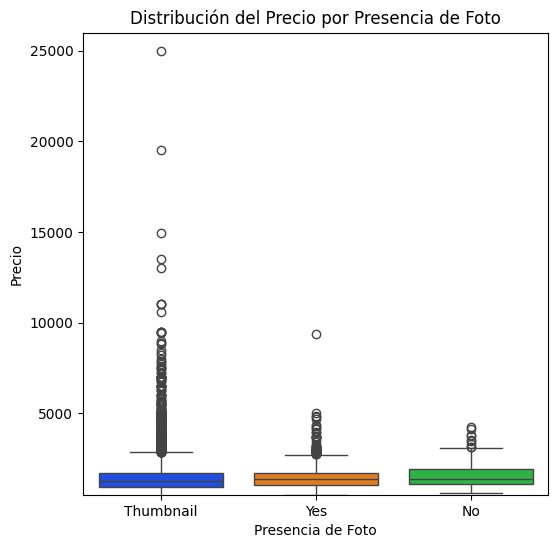

In [145]:
# Comparación de precios con y sin fotos
plt.figure(figsize=(6, 6))
sns.boxplot(x=df_duplicado["has_photo"], y=df_duplicado["price"], palette='bright')

plt.title("Distribución del Precio por Presencia de Foto")
plt.xlabel("Presencia de Foto")
plt.ylabel("Precio")
plt.ylim(500, 26000)
plt.show()

### MAPA DE CALOR - Comparacion entre precio y los amenities

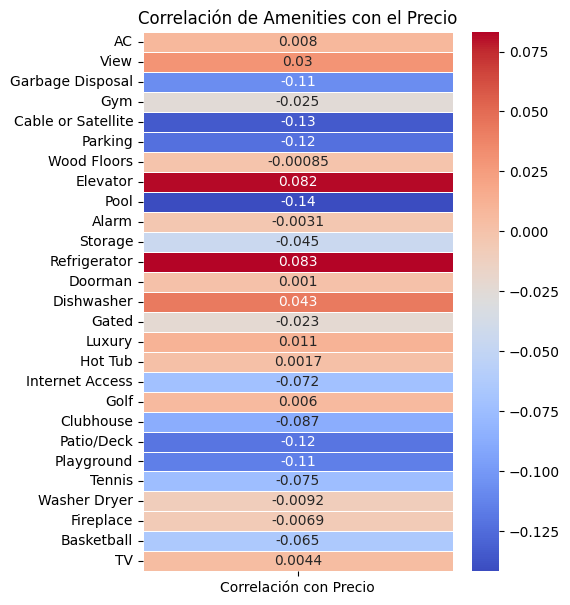

In [146]:
amenities = ["AC", "View", "Garbage Disposal", "Gym", "Cable or Satellite", "Parking", "Wood Floors", "Elevator", "Pool", "Alarm", "Storage", "Refrigerator",
             "Doorman", "Dishwasher", "Gated", "Luxury", "Hot Tub", "Internet Access", "Golf", "Clubhouse", "Patio/Deck", "Playground", "Tennis", "Washer Dryer",
             "Fireplace", "Basketball", "TV"] 

# Matriz de correlación entre precio y los amenities
df_amenities_corr = df[["price"] + amenities].corr().loc["price", amenities]

# Convertir en DataFrame
df_amenities_corr = df_amenities_corr.to_frame(name="Correlación con Precio")

# Mapa de calor de la correlacion entre precio y amenities
plt.figure(figsize=(5, 7))
sns.heatmap(df_amenities_corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlación de Amenities con el Precio")
plt.show()

### GRAFICO DE DISPERSION CON LINEA DE TENDENCIA - Comparacion entre precio y la longitud de la descripcion 

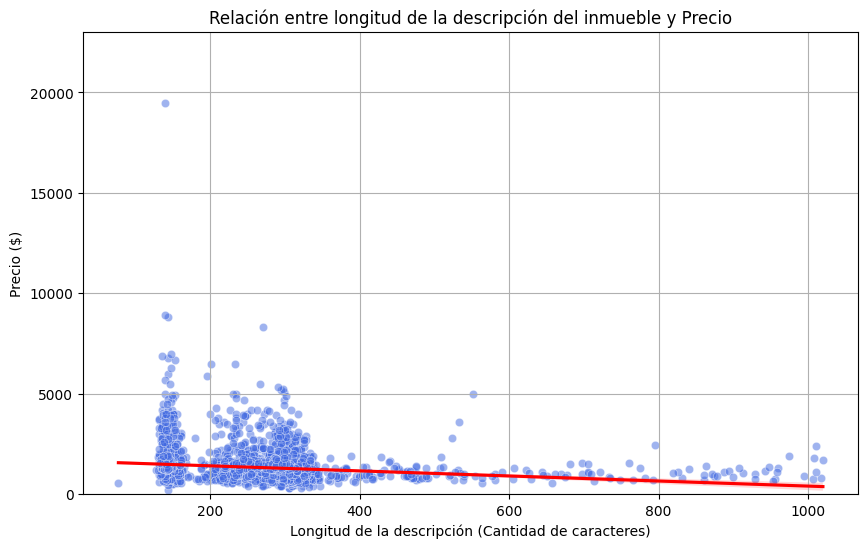

In [147]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["longitud_descripcion"], y=df["price"], alpha=0.5, color="royalblue")

# Agregar línea de tendencia
sns.regplot(x=df["longitud_descripcion"], y=df["price"], scatter=False, color="red")

plt.title("Relación entre longitud de la descripción del inmueble y Precio")
plt.xlabel("Longitud de la descripción (Cantidad de caracteres)")
plt.ylabel("Precio ($)")
plt.ylim(0, 23000)
plt.grid(True)
plt.show()

### GRAFICA DE BARRAS - Comparacion entre precio y los permisos de mascotas

/var/folders/fl/q4d2zbnn4f9d59whjf3fjk240000gn/T/ipykernel_64526/896666433.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_duplicado["pets_allowed"], y=df_duplicado["price"], estimator=np.mean, palette="pastel")


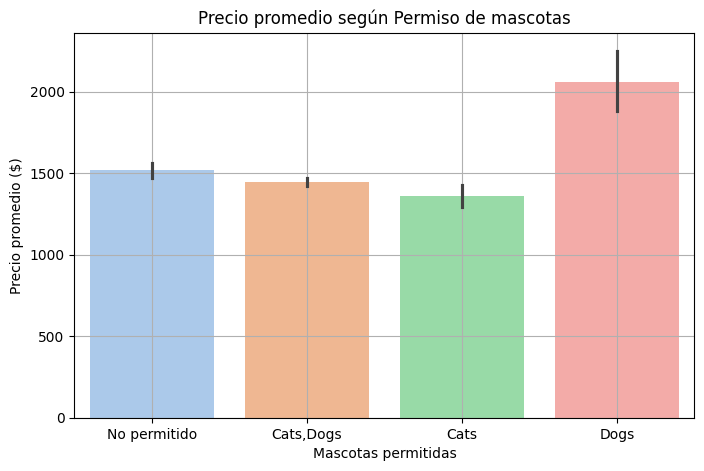

In [148]:
plt.figure(figsize=(8, 5))
sns.barplot(x=df_duplicado["pets_allowed"], y=df_duplicado["price"], estimator=np.mean, palette="pastel")

plt.title("Precio promedio según Permiso de mascotas")
plt.xlabel("Mascotas permitidas")
plt.ylabel("Precio promedio ($)")
plt.grid(True)
plt.show()

### MAPA GEOGRAFICO DE CALOR - Comparacion entre precio y ubicacion

In [149]:
# Crear un mapa base centrado en la ubicación promedio
centro = [df["latitude"].mean(), df["longitude"].mean()]
mapa = folium.Map(location=centro, zoom_start=5)

heat_data = list(zip(df["latitude"], df["longitude"], df["price"]))

# Agregar capa de mapa de calor donde el precio afecta la intensidad del color
HeatMap(heat_data, radius=15, blur=5, max_zoom=5).add_to(mapa)

# Guardar el mapa en un archivo HTML
mapa.save("mapa_precios.html")